<a href="https://colab.research.google.com/github/Muralikrishna019/Machine-Learning-Lab/blob/main/Lab_8(AP23110010656).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load Dataset

In [ ]:
df = pd.read_csv('movies.csv')
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,26.9579,8.712,28675
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,26.5804,8.686,21701
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,15.6559,8.571,13099
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,12.5642,8.565,16616
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,14.6028,8.549,9307


In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8560 entries, 0 to 8559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8560 non-null   int64  
 1   id            8560 non-null   int64  
 2   title         8560 non-null   object 
 3   overview      8559 non-null   object 
 4   release_date  8558 non-null   object 
 5   popularity    8560 non-null   float64
 6   vote_average  8560 non-null   float64
 7   vote_count    8560 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 535.1+ KB
None


Data Cleaning

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
print("\nMissing values before cleaning:\n", df.isna().sum())
df = df.dropna(subset=['title', 'release_date', 'vote_average', 'vote_count'])
print("\nMissing values after cleaning:\n", df.isna().sum())


Missing values before cleaning:
 title           0
overview        1
release_date    2
popularity      0
vote_average    0
vote_count      0
release_year    2
dtype: int64

Missing values after cleaning:
 title           0
overview        1
release_date    0
popularity      0
vote_average    0
vote_count      0
release_year    0
dtype: int64


In [ ]:
display(df.describe())

,release_date,popularity,vote_average,vote_count,release_year
count,8558,8558.000000,8558.000000,8558.000000,8558.000000
mean,2004-04-14 16:04:09.030147200,4.371726,6.867972,2192.788619,2003.739191
min,1902-06-15 00:00:00,0.003400,5.900000,300.000000,1902.000000
25%,1996-04-11 06:00:00,1.729400,6.400000,485.250000,1996.000000
50%,2009-09-18 00:00:00,2.567350,6.813000,916.500000,2009.000000
75%,2017-09-28 00:00:00,4.248825,7.298750,2237.000000,2017.000000
max,2025-07-25 00:00:00,1274.226400,8.712000,37773.000000,2025.000000
std,NaN,21.400943,0.581233,3430.525447,18.373343


Histogram of popularity

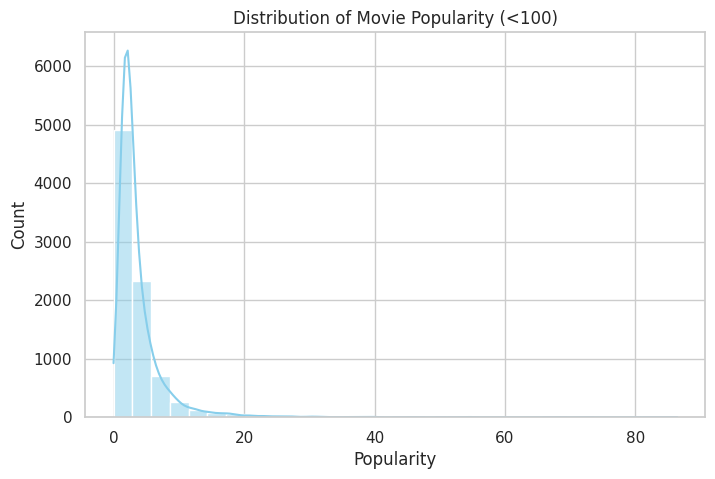

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['popularity'] < 100]['popularity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Popularity (<100)")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()

Histogram of ratings

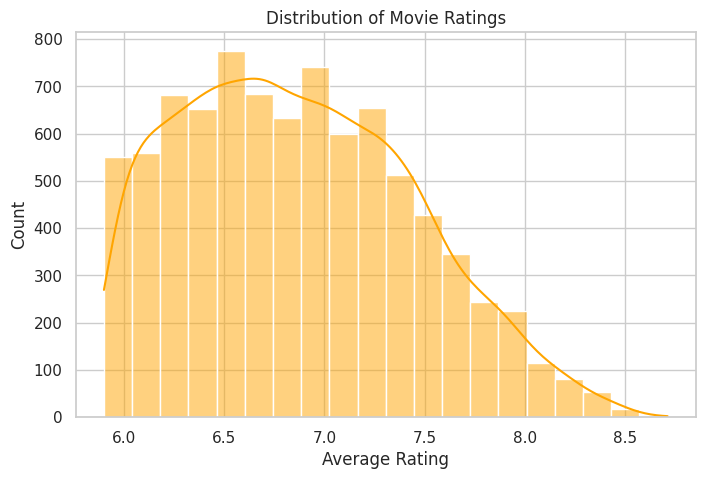

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['vote_average'], bins=20, kde=True, color='orange')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.show()

Scatterplot: popularity vs rating

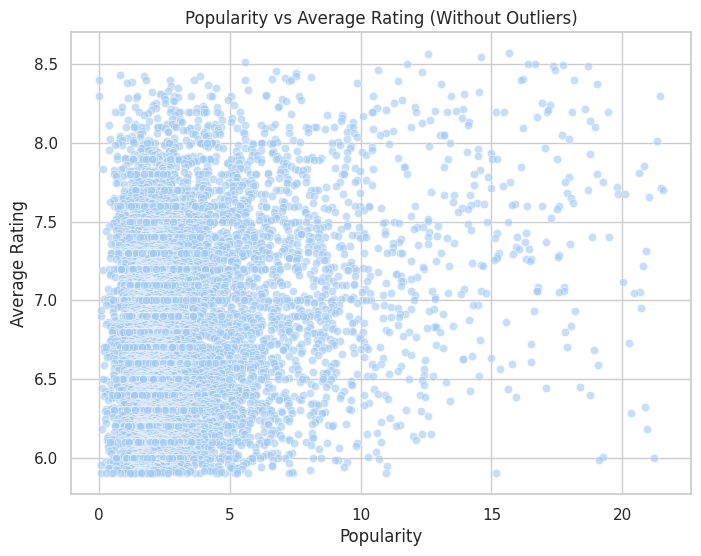

In [ ]:
filtered_df = df[df['popularity'] < df['popularity'].quantile(0.99)]
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_df, x='popularity', y='vote_average', alpha=0.6)
plt.title("Popularity vs Average Rating (Without Outliers)")
plt.xlabel("Popularity")
plt.ylabel("Average Rating")
plt.show()

Correlation heatmap

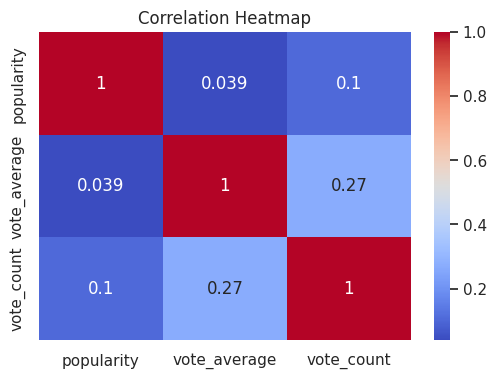

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['popularity', 'vote_average', 'vote_count']].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Top 10 most popular movies

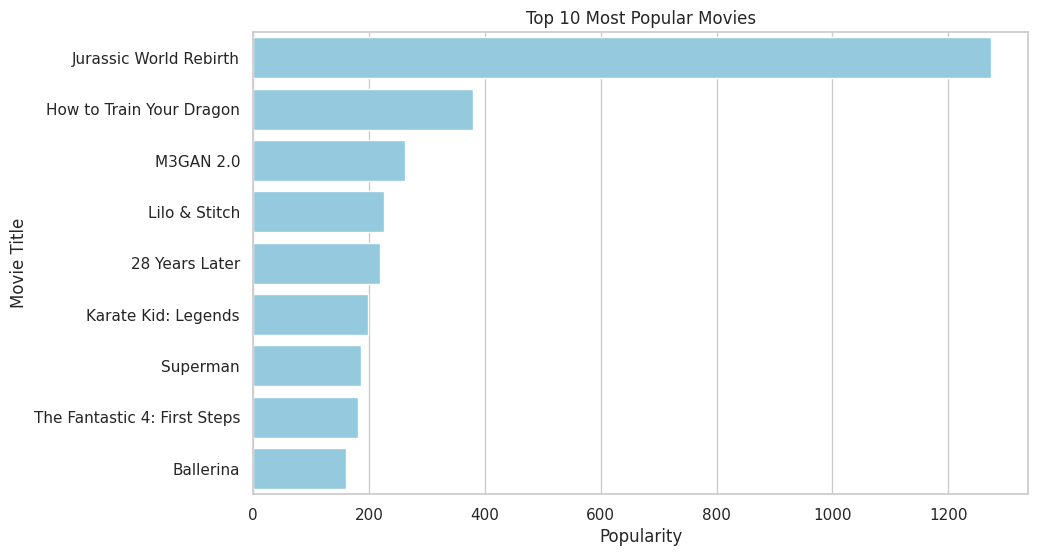

In [ ]:
top_popular = df.sort_values(by='popularity', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_popular, x='popularity', y='title', color='skyblue')
plt.title("Top 10 Most Popular Movies")
plt.xlabel("Popularity")
plt.ylabel("Movie Title")
plt.show()

Top 10 highest-rated movies

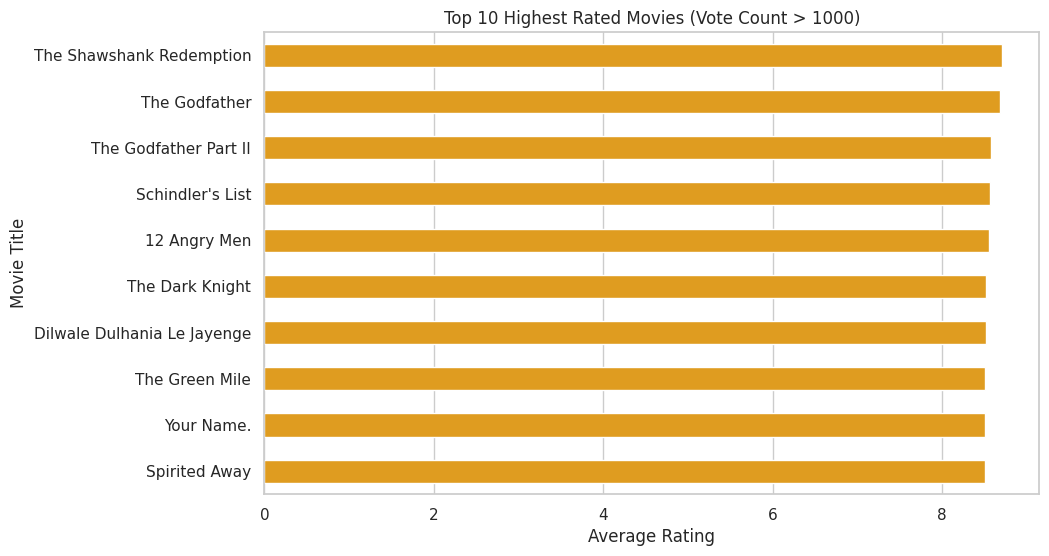

In [ ]:
top_rated = (
    df[df['vote_count'] > 1000]
    .sort_values(by='vote_average', ascending=False)
    .head(10)
)
plt.figure(figsize=(10,6))
sns.barplot(data=top_rated, x='vote_average', y='title', width=0.5, color='orange')
plt.title("Top 10 Highest Rated Movies (Vote Count > 1000)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()

Movies Released Per Year

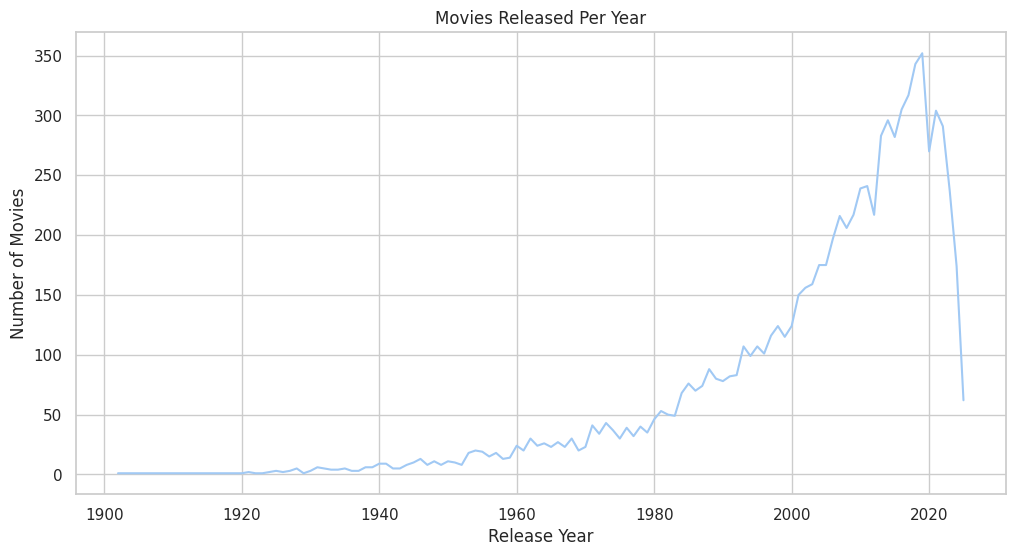

In [ ]:
movies_per_year = df[df['release_year'] > 1900]['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title("Movies Released Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.show()

In [ ]:
print("- Dataset contains", len(df), "movies from", int(df['release_year'].min()), "to", int(df['release_year'].max()))
print("- Average rating:", round(df['vote_average'].mean(), 2))
print("- Most popular movie:", df.loc[df['popularity'].idxmax(), 'title'])
print("- Highest rated movie (votes > 1000):", df.loc[top_rated.index[0], 'title'])

- Dataset contains 8558 movies from 1902 to 2025
- Average rating: 6.87
- Most popular movie: Jurassic World Rebirth
- Highest rated movie (votes > 1000): The Shawshank Redemption
